**DATA CRAWLING**

In [1]:
import bs4
import requests
from bs4 import BeautifulSoup
no=0
stars=[]
rev =[]
dic ={}
page = "https://www.yelp.com/biz/sf-fire-credit-union-san-francisco"


for i in range(15):
	url= page + "?start=" + str(no)
	no +=20

	res = requests.get(url)

	bs = BeautifulSoup(res.text,"html.parser")
	reviews = bs.findAll('div',{'class':'review-content'})

	for review in reviews:
		stars.append(review.findAll('div',{'class':'i-stars'}))

	for review in reviews:
		for j in review.findAll('p'):
			rev.append(j.text)


print(len(rev))
print(len(stars))

282
282


In [3]:
#Extracting number of stars
rat=[]
for i in range(len(stars)):
  rat.append((float)(stars[i][0]['title'][0:3]))

In [4]:
dic={}
for i in range(len(stars)):
    dic[rev[i]]=rat[i]

## Creating DataFrame

In [6]:
import pandas as pd

In [7]:
data = pd.DataFrame({"review":rev,"rating":rat},columns=["review","rating"])
data.head()

,review,rating
0,I would like to give a shout out to sf fire cr...,5.0
1,"Poor me , futures commission merchants muddyO...",3.0
2,"They will charge you a $25 ""courtesy fee"" if y...",1.0
3,I changed to a credit union because I wanted t...,1.0
4,I used to recommend SFFire to my friends (and ...,2.0


In [8]:
#converting ratings float to int. because floating points of all values are zero
data["rating"] = data["rating"].apply(lambda x : (int)(x))

In [9]:
data.to_csv("reviews.csv")

# DATA PREPROCESSING

## Removing punctuations

In [26]:
import string
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

In [27]:
#removing punctuation marks in dataset
data['review'] = data['review'].apply(remove_punctuation)

In [28]:
#no null values
data.isnull().sum()

review    0
rating    0
dtype: int64

In [29]:
data.head()

,review,rating
0,I would like to give a shout out to sf fire cr...,5
1,Poor me futures commission merchants muddyOu...,3
2,They will charge you a 25 courtesy fee if you ...,1
3,I changed to a credit union because I wanted t...,1
4,I used to recommend SFFire to my friends and g...,2


## Removing Stopwords

In [30]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/skull/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [32]:
#removing stopwords
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [33]:
data.head()

,review,rating
0,I would like give shout sf fire credit union n...,5
1,Poor futures commission merchants muddyOuter s...,3
2,They charge 25 courtesy fee go balance Not fir...,1
3,I changed credit union I wanted support local ...,1
4,I used recommend SFFire friends got several jo...,2


## Converting Everything to lowercase

In [34]:
#converting everythin to lowercase
data['review'] = data['review'].apply(lambda x: x.lower())


In [35]:
data.head()

,review,rating
0,i would like give shout sf fire credit union n...,5
1,poor futures commission merchants muddyouter s...,3
2,they charge 25 courtesy fee go balance not fir...,1
3,i changed credit union i wanted support local ...,1
4,i used recommend sffire friends got several jo...,2


## Replacing negative words with proper words

In [36]:
#Negation handling
def negitive(s):
    appos = {
    "aren't" : "are not",
    "can't" : "cannot",
    "couldn't" : "could not",
    "didn't" : "did not",
    "doesn't" : "does not",
    "don't" : "do not",
    "hadn't" : "had not",
    "hasn't" : "has not",
    "haven't" : "have not",
    "he'd" : "he would",
    "he'll" : "he will",
    "he's" : "he is",
    "i'd" : "I would",
    "i'd" : "I had",
    "i'll" : "I will",
    "i'm" : "I am",
    "isn't" : "is not",
    "it's" : "it is",
    "it'll":"it will",
    "i've" : "I have",
    "let's" : "let us",
    "mightn't" : "might not",
    "mustn't" : "must not",
    "shan't" : "shall not",
    "she'd" : "she would",
    "she'll" : "she will",
    "she's" : "she is",
    "shouldn't" : "should not",
    "that's" : "that is",
    "there's" : "there is",
    "they'd" : "they would",
    "they'll" : "they will",
    "they're" : "they are",
    "they've" : "they have",
    "we'd" : "we would",
    "we're" : "we are",
    "weren't" : "were not",
    "we've" : "we have",
    "what'll" : "what will",
    "what're" : "what are",
    "what's" : "what is",
    "what've" : "what have",
    "where's" : "where is",
    "who'd" : "who would",
    "who'll" : "who will",
    "who're" : "who are",
    "who's" : "who is",
    "who've" : "who have",
    "won't" : "will not",
    "wouldn't" : "would not",
    "you'd" : "you would",
    "you'll" : "you will",
    "you're" : "you are",
    "you've" : "you have",
    "'re": " are",
    "wasn't": "was not",
    "we'll":" will",
    "didn't": "did not"
    }

    words = s.split()
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = " ".join(reformed) 
    return reformed


In [37]:
negitive("hi i haven't")

'hi i have not'

In [38]:
data["review"] = data["review"].apply(negitive)

In [39]:
data.head()

,review,rating
0,i would like give shout sf fire credit union n...,5
1,poor futures commission merchants muddyouter s...,3
2,they charge 25 courtesy fee go balance not fir...,1
3,i changed credit union i wanted support local ...,1
4,i used recommend sffire friends got several jo...,2


## Lemmatization

In [40]:
#lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [41]:
def lemmatize_text(text):
    return (' '.join(lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)))

In [42]:
data['review'] = data["review"].apply(lemmatize_text)

In [43]:
data.head()

,review,rating
0,i would like give shout sf fire credit union n...,5
1,poor future commission merchant muddyouter spa...,3
2,they charge 25 courtesy fee go balance not fir...,1
3,i changed credit union i wanted support local ...,1
4,i used recommend sffire friend got several joi...,2


In [44]:
data.to_csv("final_data.csv")

# EDA

## WORD COUNT

In [6]:
import pandas as pd
data = pd.read_csv("final_data.csv",index_col=0)

In [15]:
data['word_count'] = data['review'].apply(lambda x: len(str(x).split(" ")))
data[['review','word_count']].head(10)

,review,word_count
0,i would like give shout sf fire credit union n...,100
1,poor future commission merchant muddyouter spa...,167
2,they charge 25 courtesy fee go balance not fir...,44
3,i changed credit union i wanted support local ...,48
4,i used recommend sffire friend got several joi...,49
5,i credit union 25 year unfortunately recent ye...,64
6,i banking sffcu 20 year past couple year servi...,92
7,used really really good now left hand doesnt k...,34
8,red flagif use half credit close credit little...,9
9,what follows verbatim feedback i sent manageme...,194


/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'frequency')

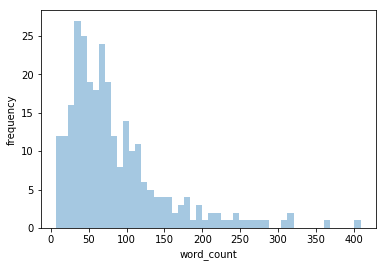

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(data["word_count"],bins=50,kde=False)
plt.xlabel("word_count")
plt.ylabel("frequency")

In [24]:
del(data["word_count"])

## Number of characters

In [26]:
data['char_count'] = data['review'].str.len() ## this also includes spaces
data[['review','char_count']].head(10)

,review,char_count
0,i would like give shout sf fire credit union n...,617
1,poor future commission merchant muddyouter spa...,1413
2,they charge 25 courtesy fee go balance not fir...,250
3,i changed credit union i wanted support local ...,314
4,i used recommend sffire friend got several joi...,339
5,i credit union 25 year unfortunately recent ye...,465
6,i banking sffcu 20 year past couple year servi...,574
7,used really really good now left hand doesnt k...,227
8,red flagif use half credit close credit little...,54
9,what follows verbatim feedback i sent manageme...,1296


/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'frequency')

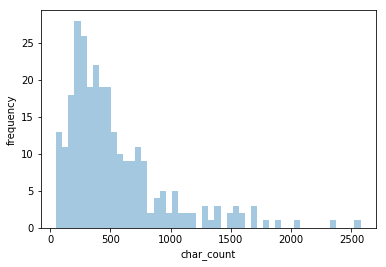

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(data["char_count"],bins=50,kde=False)
plt.xlabel("char_count")
plt.ylabel("frequency")

In [28]:
del(data["char_count"])

## Average Word Length

In [29]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['review'].apply(lambda x: avg_word(x))
data[['review','avg_word']].head(10)

,review,avg_word
0,i would like give shout sf fire credit union n...,5.180000
1,poor future commission merchant muddyouter spa...,7.467066
2,they charge 25 courtesy fee go balance not fir...,4.704545
3,i changed credit union i wanted support local ...,5.562500
4,i used recommend sffire friend got several joi...,5.938776
5,i credit union 25 year unfortunately recent ye...,6.281250
6,i banking sffcu 20 year past couple year servi...,5.250000
7,used really really good now left hand doesnt k...,5.705882
8,red flagif use half credit close credit little...,5.111111
9,what follows verbatim feedback i sent manageme...,5.685567


/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'frequency')

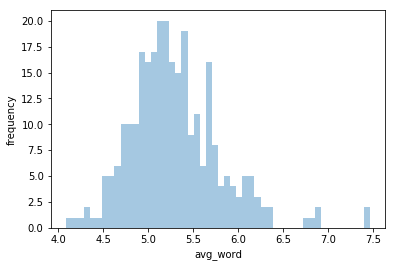

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(data["avg_word"],bins=50,kde=False)
plt.xlabel("avg_word")
plt.ylabel("frequency")

In [31]:
del(data["avg_word"])

## Rare words

In [34]:
freq = pd.Series(' '.join(data['review']).split()).value_counts()[-10:]
freq

aspect        1
jipped        1
designated    1
informed      1
sucker        1
knocked       1
sffcuwhat     1
involved      1
rush          1
unforeseen    1
dtype: int64

### remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise

In [35]:
freq = list(freq.index)
data['review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data.head()

,review,rating
0,i would like give shout sf fire credit union n...,5
1,poor future commission merchant muddyouter spa...,3
2,they charge 25 courtesy fee go balance not fir...,1
3,i changed credit union i wanted support local ...,1
4,i used recommend sffire friend got several joi...,2


/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'frequecy')

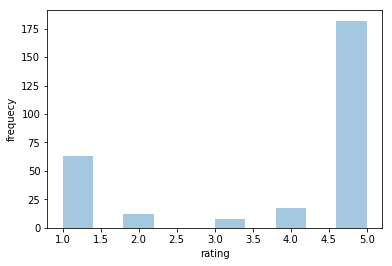

In [57]:
sns.distplot(data["rating"],kde=False,bins=10)
plt.xlabel("rating")
plt.ylabel("frequecy")

## N-grams

In [40]:
#bigrams
TextBlob(data['review'][0]).ngrams(2)

[WordList(['i', 'would']),
 WordList(['would', 'like']),
 WordList(['like', 'give']),
 WordList(['give', 'shout']),
 WordList(['shout', 'sf']),
 WordList(['sf', 'fire']),
 WordList(['fire', 'credit']),
 WordList(['credit', 'union']),
 WordList(['union', 'note']),
 WordList(['note', 'im']),
 WordList(['im', 'real']),
 WordList(['real', 'estate']),
 WordList(['estate', 'industry']),
 WordList(['industry', 'ive']),
 WordList(['ive', 'worked']),
 WordList(['worked', 'number']),
 WordList(['number', 'bank']),
 WordList(['bank', 'credit']),
 WordList(['credit', 'union']),
 WordList(['union', 'these']),
 WordList(['these', 'guy']),
 WordList(['guy', 'easy']),
 WordList(['easy', 'work']),
 WordList(['work', 'get']),
 WordList(['get', 'thing']),
 WordList(['thing', 'done']),
 WordList(['done', 'timely']),
 WordList(['timely', 'manor']),
 WordList(['manor', 'call']),
 WordList(['call', 'always']),
 WordList(['always', 'someone']),
 WordList(['someone', 'available']),
 WordList(['available', 'pic

In [42]:
#trigrams
TextBlob(data['review'][0]).ngrams(3)

[WordList(['i', 'would', 'like']),
 WordList(['would', 'like', 'give']),
 WordList(['like', 'give', 'shout']),
 WordList(['give', 'shout', 'sf']),
 WordList(['shout', 'sf', 'fire']),
 WordList(['sf', 'fire', 'credit']),
 WordList(['fire', 'credit', 'union']),
 WordList(['credit', 'union', 'note']),
 WordList(['union', 'note', 'im']),
 WordList(['note', 'im', 'real']),
 WordList(['im', 'real', 'estate']),
 WordList(['real', 'estate', 'industry']),
 WordList(['estate', 'industry', 'ive']),
 WordList(['industry', 'ive', 'worked']),
 WordList(['ive', 'worked', 'number']),
 WordList(['worked', 'number', 'bank']),
 WordList(['number', 'bank', 'credit']),
 WordList(['bank', 'credit', 'union']),
 WordList(['credit', 'union', 'these']),
 WordList(['union', 'these', 'guy']),
 WordList(['these', 'guy', 'easy']),
 WordList(['guy', 'easy', 'work']),
 WordList(['easy', 'work', 'get']),
 WordList(['work', 'get', 'thing']),
 WordList(['get', 'thing', 'done']),
 WordList(['thing', 'done', 'timely']),
 

## Naive Bayes Model

In [44]:
X=data["review"]
y=data["rating"]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(X.values)
targets = y.values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(counts, targets, test_size=0.30)

In [50]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
pred=classifier.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:
print(accuracy_score(pred,y_test))

0.8
